## Plotter
The goal for this jupyter notebook is to plot CheY activity changes through time for different gradient shapes.

In [3]:
#Specify the data to plot here.
model_path = "addition"  #The folder containing the model
model_name = "addition"  #Name of the model
target = "ActiveCheY"    #Target molecule
vals = [0.01, 0.03, 0.05, 0.1, 0.3, 0.5]  #Gradients of interest

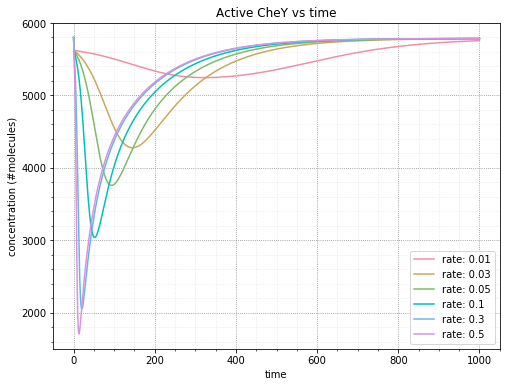

In [4]:
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import colorspace


#Define the colors to use
colors = colorspace.qualitative_hcl(h=[0, 300.], c = 60, l = 70, pallete = "dynamic")(len(vals))


def load_data(val):
    file_path = os.path.join(model_path, str(val), model_name + ".gdat")
    with open(file_path) as f:
        first_line = f.readline() #Read the first line
    cols = first_line.split()[1:] #Get the col names (species names)

    ind = 0
    while cols[ind] != target:
        ind += 1                  #Get col number of target molecule

    data = np.loadtxt(file_path)  #Load the file
    time = data[:, 0]             #Time points
    concentration = data[:, ind]  #Concentrations

    return time, concentration


def plot(val, time, concentration, ax, i):
    legend = "rate: " + str(val)
    ax.plot(time, concentration, label = legend, color = colors[i])
    ax.legend()

    return


fig, ax = plt.subplots(1, 1, figsize = (8, 6))
for i in range(len(vals)):
    val = vals[i]
    time, concentration = load_data(val)
    plot(val, time, concentration, ax, i)

plt.xlabel("time")
plt.ylabel("concentration (#molecules)")
plt.title("Active CheY vs time")
ax.minorticks_on()
ax.grid(b = True, which = 'minor', axis = 'both', color = 'lightgrey', linewidth = 0.5, linestyle = ':')
ax.grid(b = True, which = 'major', axis = 'both', color = 'grey', linewidth = 0.8 , linestyle = ':')

plt.show()